In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
from pathlib import Path
from tqdm.auto import tqdm

base_path = "/Users/gwonsmpro/Documents/GitHub/Utils/hc"
folder_list = sorted([o for o in os.listdir(base_path)])

print(folder_list)
for folder in tqdm(folder_list):
    img_list = Path(f"{base_path}/{folder}").glob("*.png")
    for img_name in sorted(img_list):
        img = cv2.imread(str(img_name), cv2.IMREAD_GRAYSCALE)

        half_img1, half_img2 = img[:, :img.shape[1] // 2], img[:, img.shape[1] // 2:]
        projection = np.sum(half_img1, axis=0, dtype=np.int64)
        peak_v = np.diff(projection)
        first_min = peak_v.argmin()
        first_max = peak_v.argmax()
        second_smallest_value = np.partition(peak_v.flatten(), 1)[1]
        index_second_smallest = np.where(peak_v == second_smallest_value)
        second_largest_value = np.partition(peak_v.flatten(), -2)[-2]
        index_second_largest = np.where(peak_v == second_largest_value)


        sorted_v1 = sorted([first_min, index_second_smallest[0][0], first_max, index_second_largest[0][0]])
        v_min = sorted_v1[0]
        crop_v_min = sorted_v1[-1]

        # print(sorted([first_min, index_second_smallest[0][0], first_max, index_second_largest[0][0]]))

        projection = np.sum(half_img2, axis=0, dtype=np.int64)
        peak_v = np.diff(projection)
        first_min = peak_v.argmin()
        first_max = peak_v.argmax()
        second_smallest_value = np.partition(peak_v.flatten(), 1)[1]
        index_second_smallest = np.where(peak_v == second_smallest_value)
        second_largest_value = np.partition(peak_v.flatten(), -2)[-2]
        index_second_largest = np.where(peak_v == second_largest_value)


        sorted_v2 = sorted([first_min, index_second_smallest[0][0], first_max, index_second_largest[0][0]])

        v_max = (img.shape[1] // 2) + sorted_v2[-1]
        crop_v_max = (img.shape[1] // 2) + sorted_v2[0]

        # print(sorted([first_min, index_second_smallest[0][0], first_max, index_second_largest[0][0]]))
        # peak_h
        projection_h = np.sum(img, axis=1, dtype=np.int64)
        peak_h = np.diff(projection_h)

        # saved & visualization
        img2 = img[:np.argmin(peak_h), v_min:v_max]
        crop_img = img[:np.argmin(peak_h), crop_v_min:crop_v_max]
        crop_equalized_img = cv2.equalizeHist(crop_img)
        equalized_img = img2.copy()
        # equalized_img[:np.argmin(peak_h), crop_v_min:crop_v_max] = crop_equalized_img
        equalized_img[:np.argmin(peak_h), crop_v_min - v_min:crop_v_max - v_max] = crop_equalized_img

        # Save the result
        saved_name = f"{str(img_name)[:-4]}_equalized.png"
        cv2.imwrite(saved_name, equalized_img)

['hc']


  0%|          | 0/1 [00:00<?, ?it/s]

# 하나 테스트

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img_name = "/Users/gwonsmpro/Documents/GitHub/Utils/bb_2.png"
img = cv2.imread(str(img_name), cv2.IMREAD_GRAYSCALE)

half_img1, half_img2 = img[:, :img.shape[1] // 2], img[:, img.shape[1] // 2:]

# vertical 1
projection1 = np.sum(half_img1, axis=0, dtype=np.int64)
peak_v = np.diff(projection1)
first_min = peak_v.argmin()
first_max = peak_v.argmax()
second_smallest_value = np.partition(peak_v.flatten(), 1)[1]
index_second_smallest = np.where(peak_v == second_smallest_value)
second_largest_value = np.partition(peak_v.flatten(), -2)[-2]
index_second_largest = np.where(peak_v == second_largest_value)
sorted_v1 = sorted([first_min, index_second_smallest[0][0], first_max, index_second_largest[0][0]])
v_min = sorted_v1[0]
crop_v_min = sorted_v1[-1]

# vertical 2
projection2 = np.sum(half_img2, axis=0, dtype=np.int64)
peak_v = np.diff(projection2)
first_min = peak_v.argmin()
first_max = peak_v.argmax()
second_smallest_value = np.partition(peak_v.flatten(), 1)[1]
index_second_smallest = np.where(peak_v == second_smallest_value)
second_largest_value = np.partition(peak_v.flatten(), -2)[-2]
index_second_largest = np.where(peak_v == second_largest_value)

sorted_v2 = sorted([first_min, index_second_smallest[0][0], first_max, index_second_largest[0][0]])
v_max = (img.shape[1] // 2) + sorted_v2[-1]
crop_v_max = (img.shape[1] // 2) + sorted_v2[0]


projection_h = np.sum(img, axis=1, dtype=np.int64)
peak_h = np.diff(projection_h)

# saved & visualization
img2 = img[:np.argmin(peak_h), :]
crop_img = img[:np.argmin(peak_h), :]
crop_equalized_img = cv2.equalizeHist(crop_img)
equalized_img = img2.copy()
# equalized_img[:np.argmin(peak_h), crop_v_min:crop_v_max] = crop_equalized_img
equalized_img[:np.argmin(peak_h), :] = crop_equalized_img

# Save the result
saved_name = f"{str(img_name)[:-4]}_equalized.png"
cv2.imwrite(saved_name, equalized_img)

True

In [84]:
img_name = "/Users/gwonsmpro/Documents/GitHub/Utils/hc/hc/Insp_180503_0.png"
img = cv2.imread(str(img_name), cv2.IMREAD_GRAYSCALE)
projection1 = np.sum(img, axis=0, dtype=np.int64)
# 첫 번째 임계치 설정
threshold1 = 1.1 * np.min(projection1)

print(threshold1)
# 첫 번째 왼쪽 경계 찾기
for i in range(len(projection1)):
    if projection1[i] < threshold1:
        left_boundary1 = i
        break

# 첫 번째 오른쪽 경계 찾기
for i in range(len(projection1)-1, -1, -1):
    if projection1[i] < threshold1:
        right_boundary1 = i
        break


cropped_image = img[:, left_boundary1:right_boundary1]
crop_const = 80
cropped_image2 = img[:, left_boundary1 + crop_const : right_boundary1 - crop_const]

328456.7


In [85]:
left_boundary1,np.min(projection1)

(153, 298597)

In [81]:
projection1[0]

332171

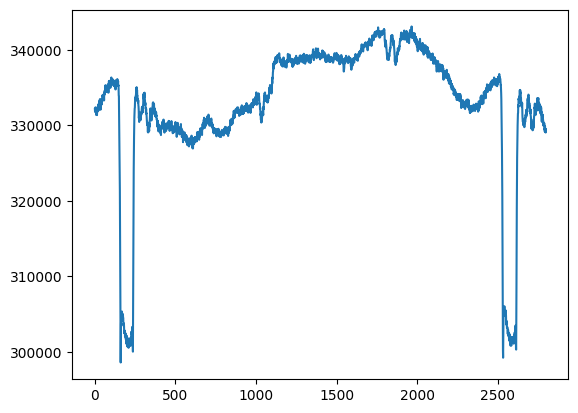

In [86]:
plt.plot(projection1)
plt.show()

Img size = (2868, 2615)
cropped image size= (2868, 2614)
cropped_image2 size = (2868, 2454)


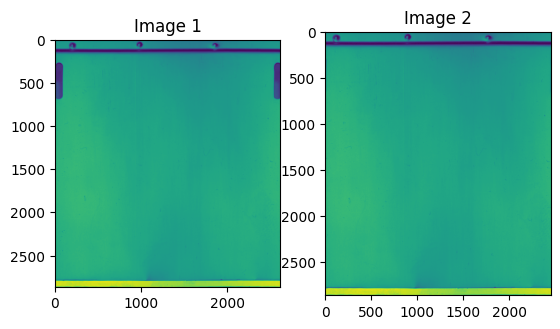

In [53]:
print(f"Img size = {img.shape}")
print(f"cropped image size= {cropped_image.shape}")
print(f"cropped_image2 size = {cropped_image2.shape}")

fig, axs = plt.subplots(1, 2)

# 첫 번째 서브플롯에 이미지 표시
axs[0].imshow(cropped_image)
axs[0].set_title('Image 1')

# 두 번째 서브플롯에 이미지 표시
axs[1].imshow(cropped_image2)
axs[1].set_title('Image 2')

# 각각의 서브플롯의 축과 눈금 숨기기
# for ax in axs:
#     ax.axis('off')

# 그래프 표시
plt.show()

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
from pathlib import Path
from tqdm.auto import tqdm

base_path = "/Users/gwonsmpro/Documents/GitHub/Utils/hc"
folder_list = sorted([o for o in os.listdir(base_path)])

print(folder_list)
for folder in tqdm(folder_list):
    img_list = Path(f"{base_path}/{folder}").glob("*.png")
    for img_name in sorted(img_list):
        img = cv2.imread(str(img_name), cv2.IMREAD_GRAYSCALE)

        projection1 = np.sum(img, axis=0, dtype=np.int64)
        # 첫 번째 임계치 설정
        threshold1 = 0.05 * np.max(projection1)

        # 첫 번째 왼쪽 경계 찾기
        for i in range(len(projection1)):
            if projection1[i] > threshold1:
                left_boundary1 = i
                break

        # 첫 번째 오른쪽 경계 찾기
        for i in range(len(projection1)-1, -1, -1):
            if projection1[i] > threshold1:
                right_boundary1 = i
                break

        # cropped_image = img[:, left_boundary1:right_boundary1]
        # crop_const = 80
        # cropped_image2 = img[:, :]

        projection_h = np.sum(img, axis=1, dtype=np.int64)
        peak_h = np.diff(projection_h)

        # saved & visualization
        # img2 = img[np.argmin(peak_h) - 300:np.argmin(peak_h), left_boundary1:right_boundary1]
        crop_const = 80
        crop_img = img[np.argmin(peak_h) - 300:np.argmin(peak_h), :]
        crop_equalized_img = cv2.equalizeHist(crop_img)
        equalized_img = img.copy()
        # equalized_img[np.argmin(peak_h) - 300:np.argmin(peak_h), crop_v_min:crop_v_max] = crop_equalized_img
        equalized_img[np.argmin(peak_h) - 300:np.argmin(peak_h), :] = crop_equalized_img

        # Save the result
        saved_name = f"{str(img_name)[:-4]}_equalized.png"
        cv2.imwrite(saved_name, equalized_img)

['hc']


  0%|          | 0/1 [00:00<?, ?it/s]